In [111]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
# Load Data
# Read the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')

In [113]:
# Display the first few rows of the dataset
df.head(11)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [114]:
# Descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset:")
df.describe()


Descriptive statistics of the dataset:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [115]:
# Set the 'id' column as the index of the DataFrame
df = df.set_index('id')

In [116]:
# Drop the 'Unnamed: 32' column as it appears to be irrelevant
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [117]:
# Columns in the dataset
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [118]:
# Encoding diagnosis column: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [119]:
# Display counts of Benign and Malignant cases
print("\nCounts of Benign and Malignant cases:")
print(df.groupby('diagnosis').size())


Counts of Benign and Malignant cases:
diagnosis
0    357
1    212
dtype: int64


In [120]:
# Information about the dataset
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float


Histograms for each variable:


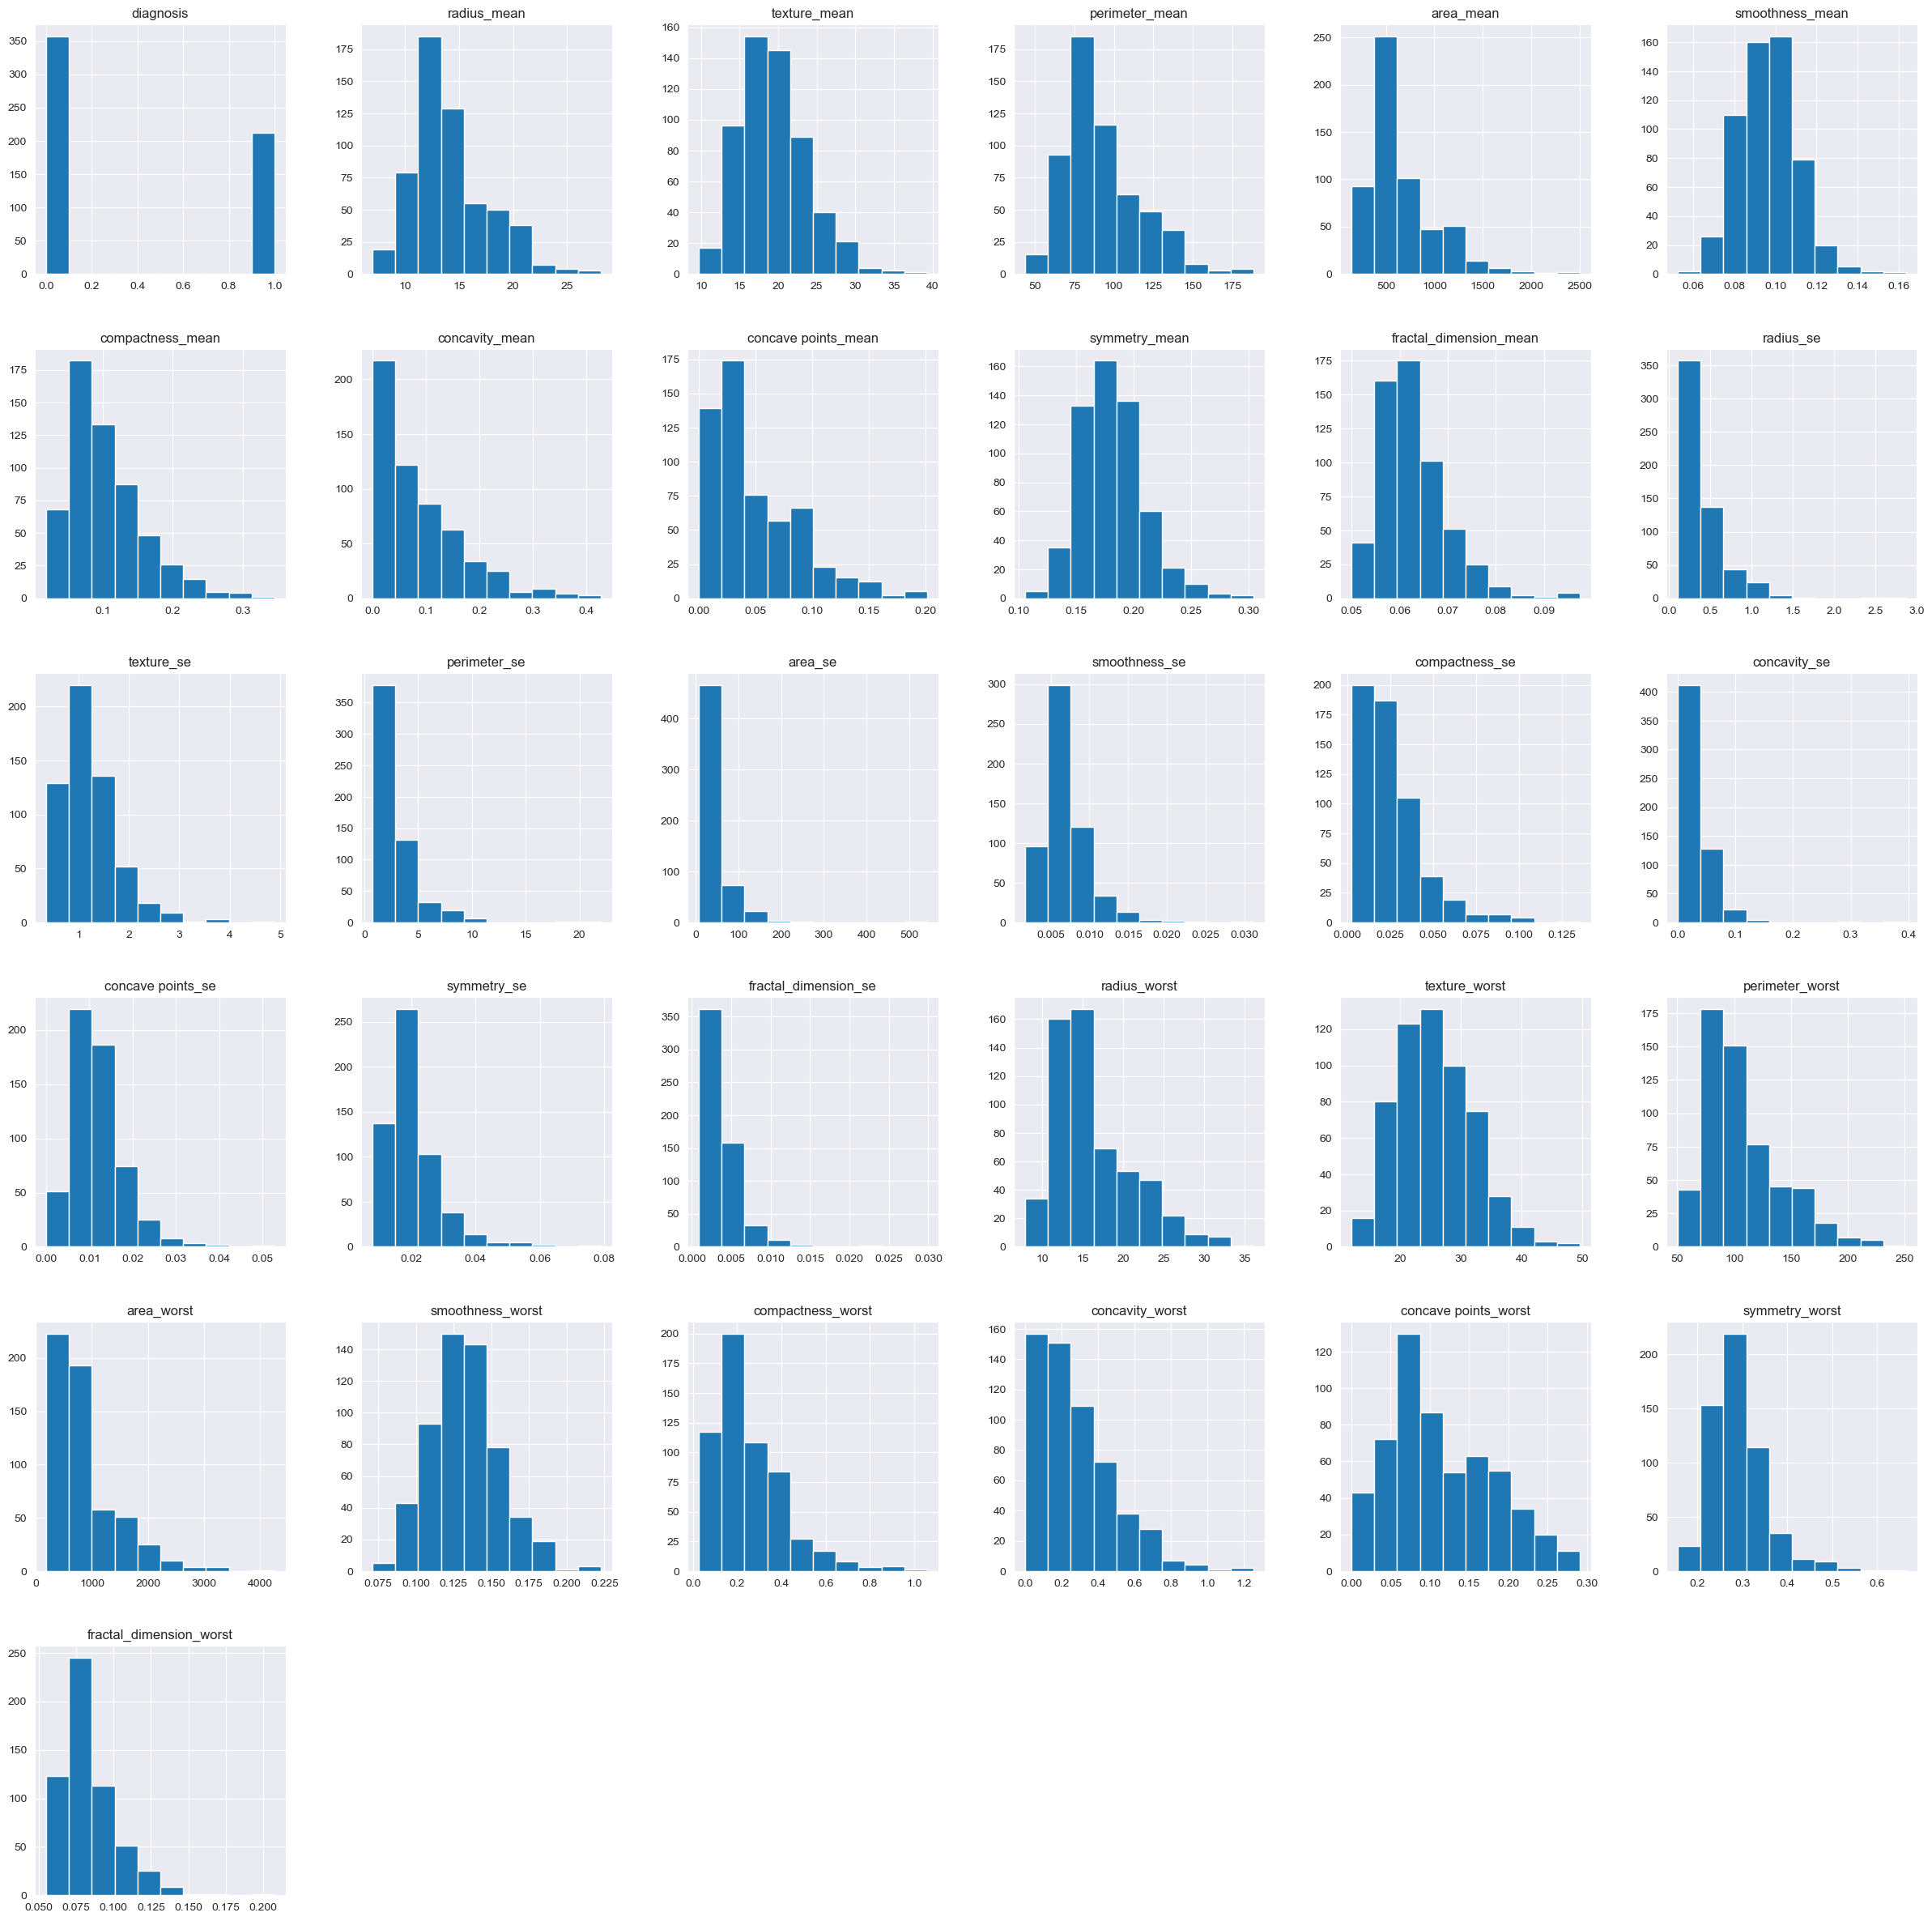

In [121]:
# Plot histograms for each variable
print("\nHistograms for each variable:")
sns.set_style('darkgrid')
df.hist(figsize=(30, 30))
plt.show()


Heatmap of correlations:


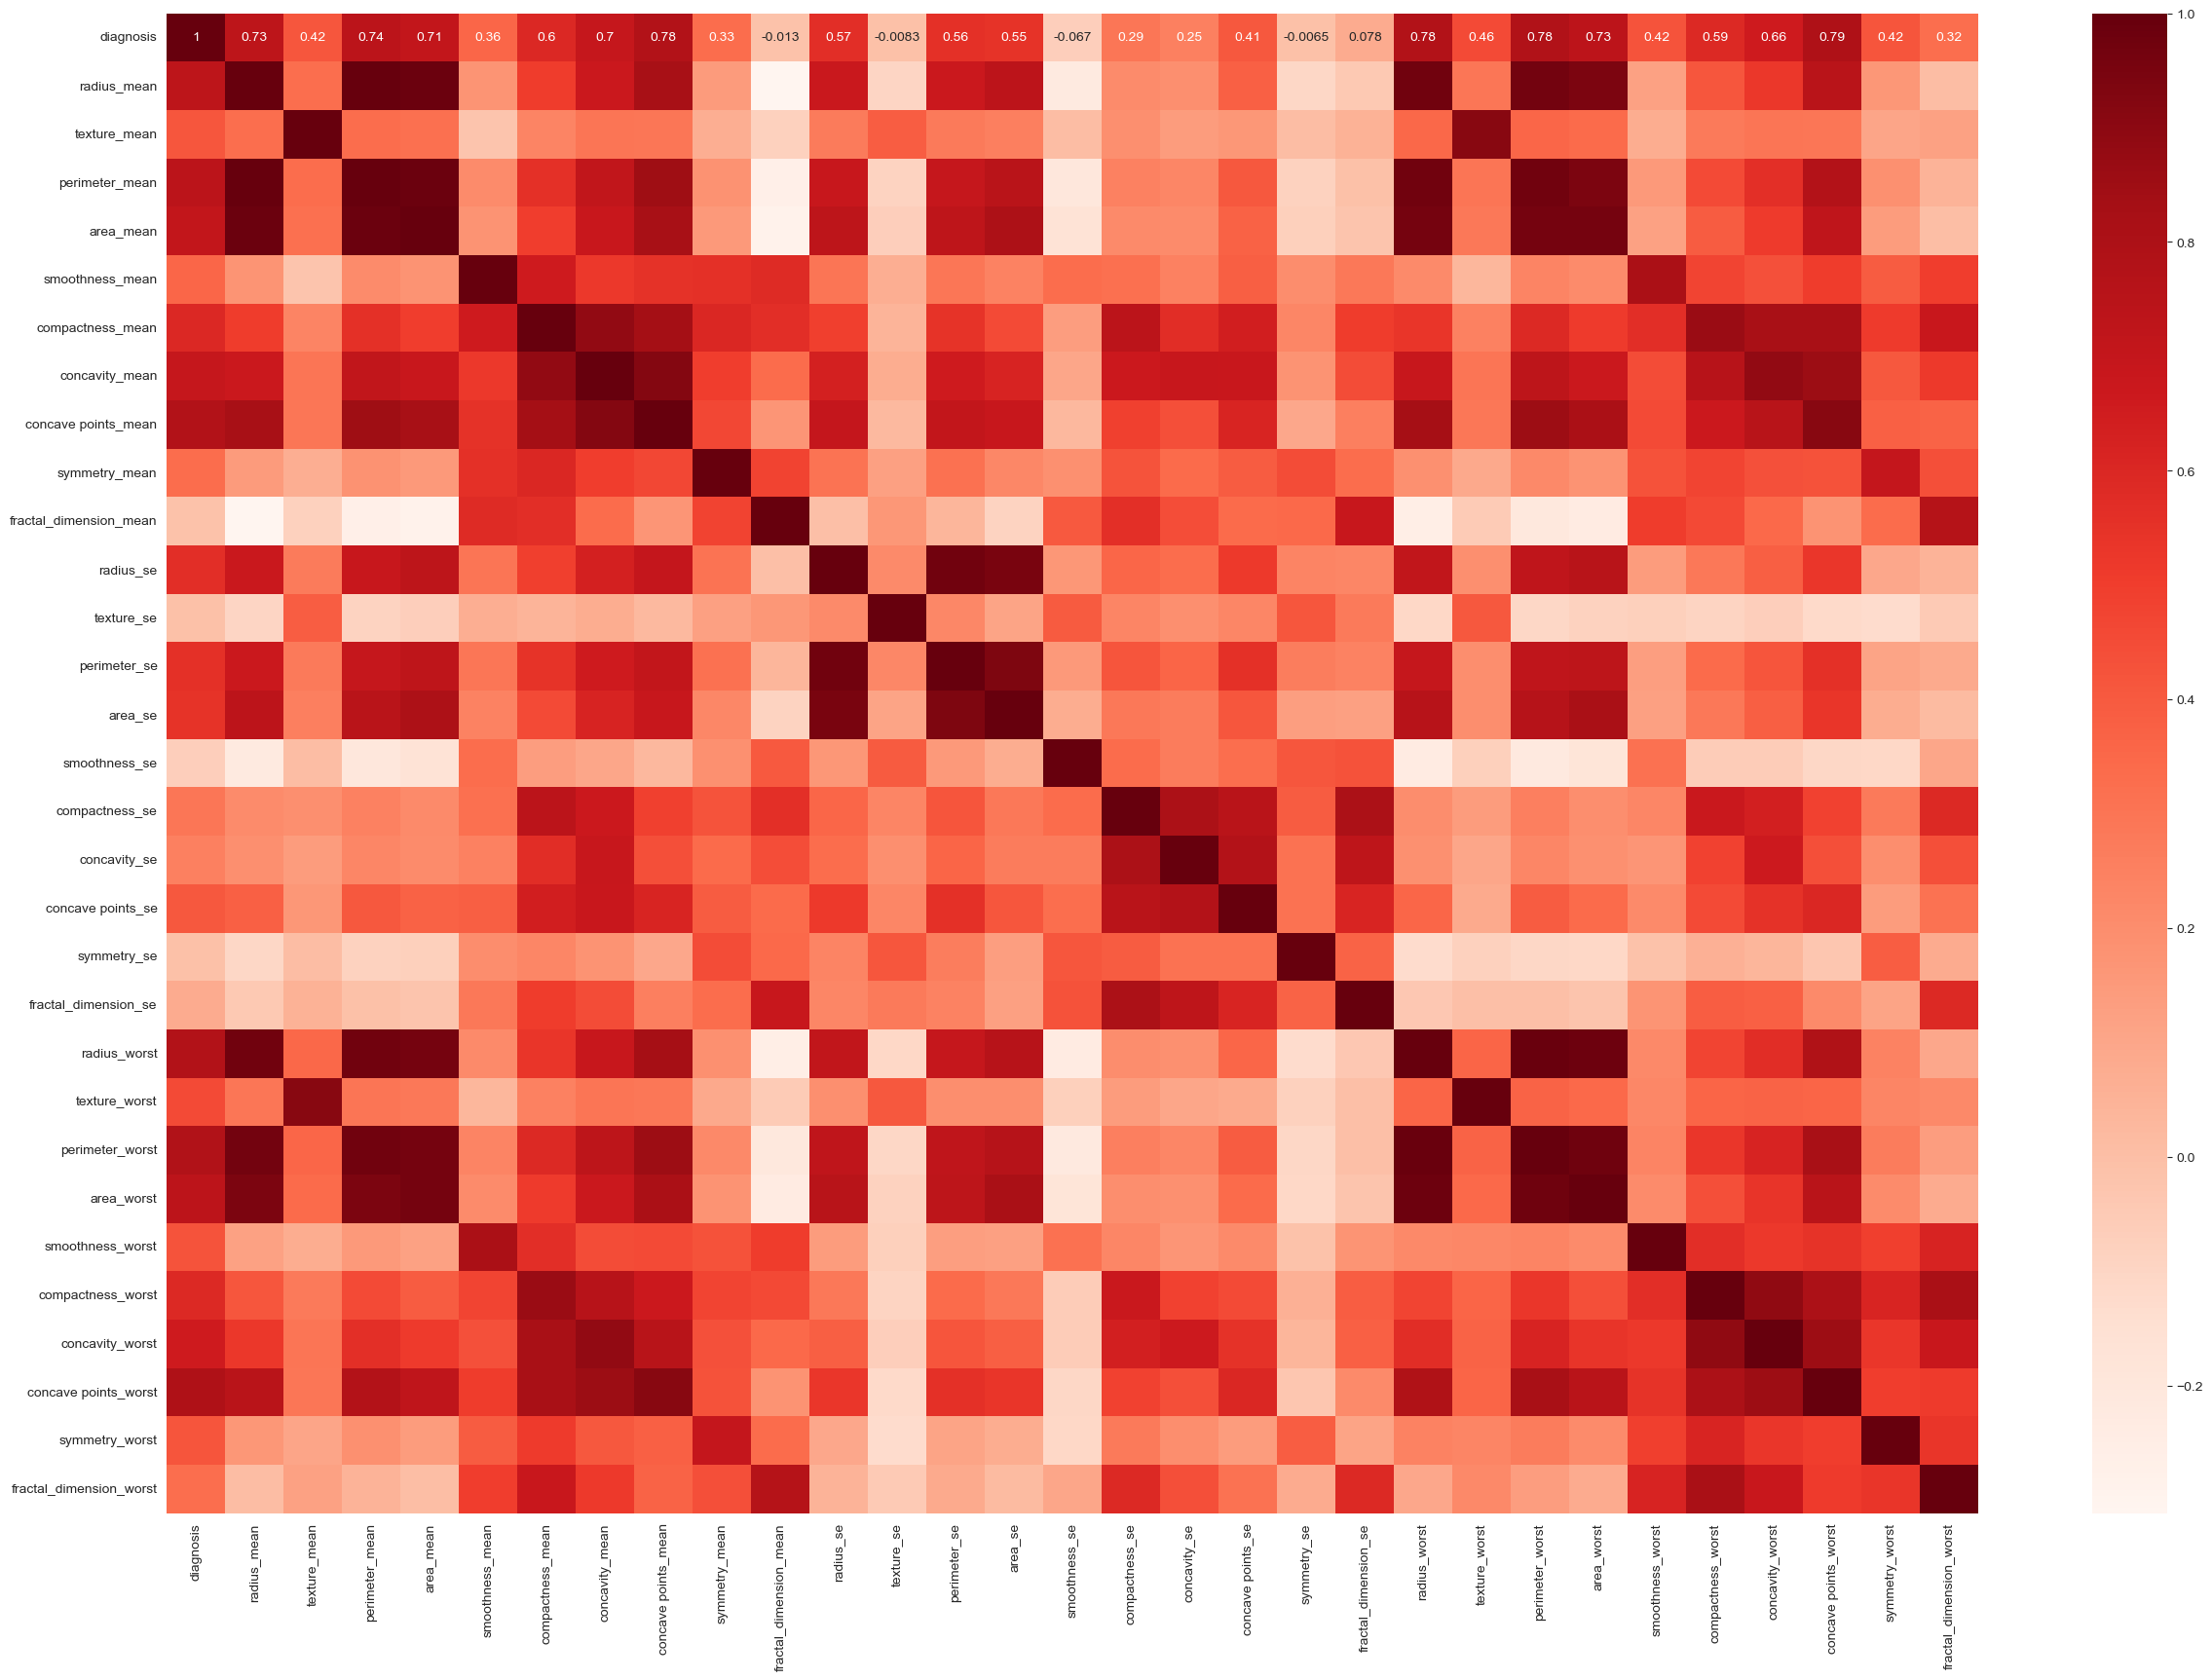

In [122]:
# Plot heatmap of correlations
print("\nHeatmap of correlations:")
plt.figure(figsize=(30, 20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [123]:
# Correlation with output variable
cor_target = abs(cor["diagnosis"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.7]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [124]:
# Split the data into predictor variables and the target variable, followed by train-test split
Y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=21)

In [125]:
# Define models to train
models = [
    ('CART', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('NB', GaussianNB()),
    ('KNN', KNeighborsClassifier())
]

In [126]:
# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model: Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model: Mean accuracy is 0.925362 (Std accuracy is 0.038358)
For SVM Model: Mean accuracy is 0.907681 (Std accuracy is 0.054723)
For NB Model: Mean accuracy is 0.940773 (Std accuracy is 0.033921)
For KNN Model: Mean accuracy is 0.927729 (Std accuracy is 0.055250)


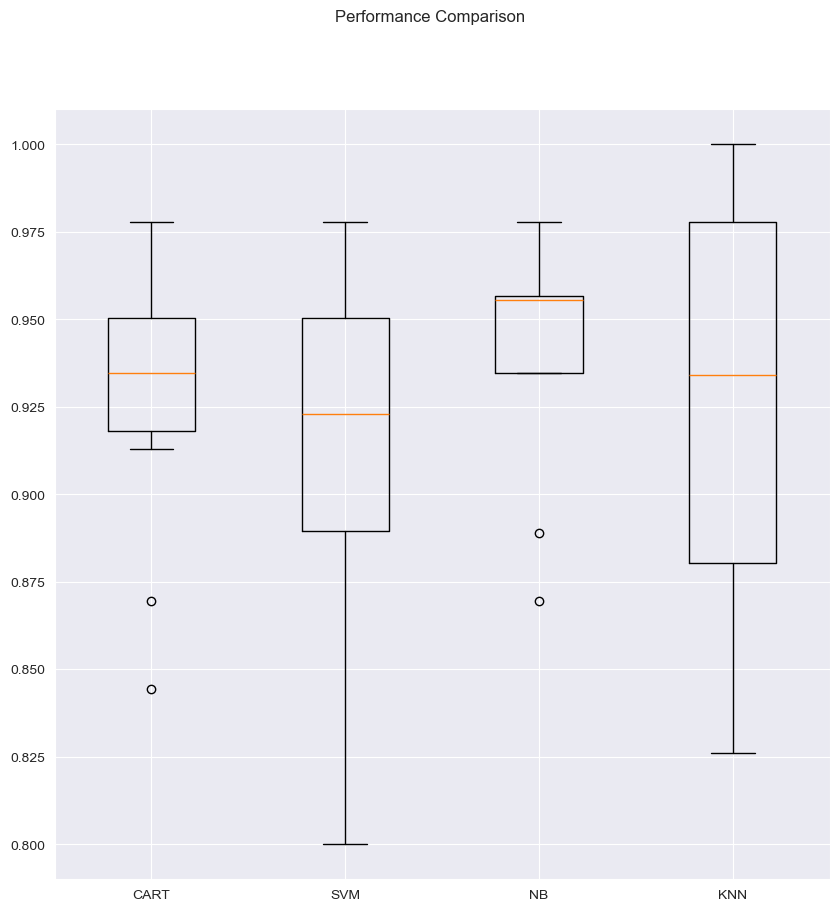

In [127]:
# Compare model performances using boxplots
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [128]:
# Standardize the dataset
pipelines = [
    ('Scaled CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])),
    ('Scaled SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])),
    ('Scaled NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])),
    ('Scaled KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]))
]

results = []
names = []

kfold = KFold(n_splits=10)
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("For %s Model: Mean Accuracy is %f (Std Accuracy is %f)" % (name, cv_results.mean(), cv_results.std()))

For Scaled CART Model: Mean Accuracy is 0.916570 (Std Accuracy is 0.033801)
For Scaled SVM Model: Mean Accuracy is 0.964879 (Std Accuracy is 0.038621)
For Scaled NB Model: Mean Accuracy is 0.931932 (Std Accuracy is 0.038625)
For Scaled KNN Model: Mean Accuracy is 0.958357 (Std Accuracy is 0.038595)


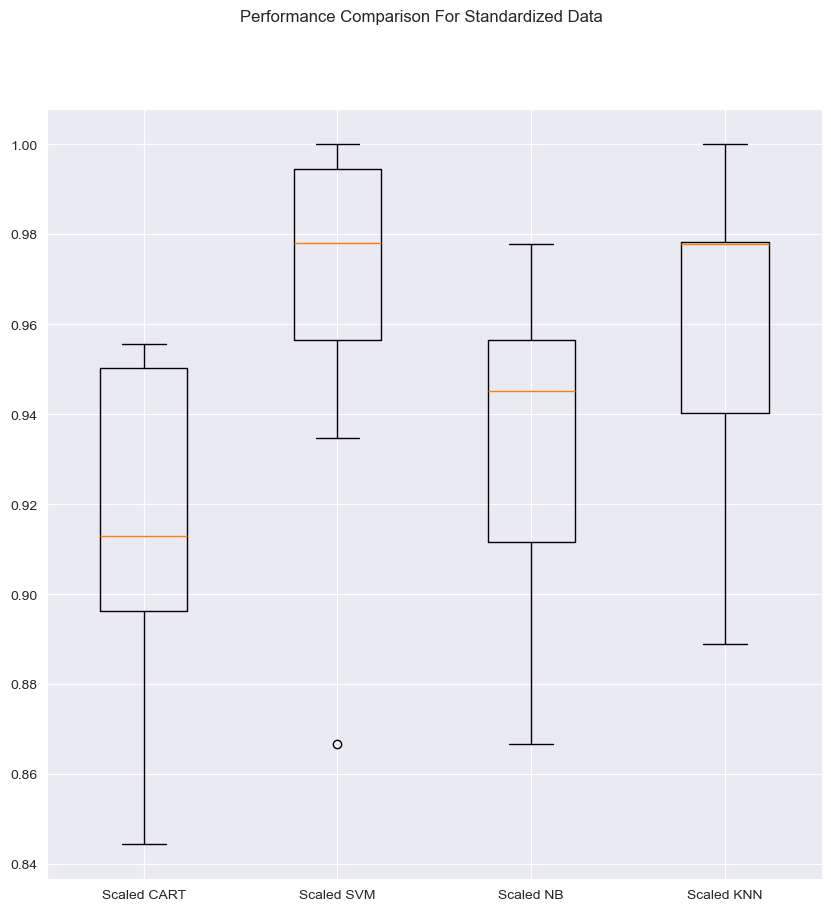

In [129]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Performance Comparison For Standardized Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [130]:
# Make predictions on validation dataset
for name, model in models:
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    model.fit(X_train_scaled, Y_train)
    X_test_scaled = scaler.transform(X_test)
    predictions = model.predict(X_test_scaled)
    print("\nModel:", name)
    print("Accuracy score:", accuracy_score(Y_test, predictions))
    print("Classification report:\n", classification_report(Y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))


Model: CART
Accuracy score: 0.9385964912280702
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.90      0.92      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
 [[71  4]
 [ 3 36]]

Model: SVM
Accuracy score: 0.9824561403508771
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[74  1]
 [ 1 38]]

Model: NB
Accuracy score: 0.9385964912280702
Classification report:
               precision    recall  f1-score   support

  